<a href="https://colab.research.google.com/github/mayarmostaf/Hand-Gesture-Classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
raw_data = pd.read_csv("raw_data/hand_landmarks_data.csv")
raw_data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [ ]:
raw_data.info() #no nulls
                #all float so need for type conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [ ]:
raw_data.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [ ]:
print(len(raw_data["label"].unique()))
raw_data["label"].value_counts()

18


label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

### Drop All Z Columns

In [ ]:
#z is already processed by mediapipe approx. = 0
cols=["z"+str(i) for i in range(1,22)]
raw_data.drop(columns=cols, inplace=True)
raw_data

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,262.669968,257.304901,257.417542,247.109055,246.882957,241.716827,236.384537,241.453918,230.076668,243.947525,...,268.069519,236.512527,251.706177,223.345093,255.490692,215.043365,258.114746,208.006393,259.608673,call
1,83.351778,346.059113,81.925037,328.562347,90.080132,311.535248,95.641823,298.860626,94.470360,287.298767,...,336.647949,116.245079,341.947784,132.451618,341.794434,142.773582,342.829254,152.431698,343.015991,call
2,187.756977,260.235492,195.460579,241.506035,207.259529,223.674339,215.413628,209.035360,214.772873,196.609588,...,264.505473,230.100174,265.584175,250.301010,268.602938,262.425133,271.276638,272.989952,272.272231,call
3,114.976696,331.594238,114.503494,320.549957,116.636627,310.080994,117.685066,301.874115,116.766609,294.977814,...,324.407806,135.485836,329.050110,145.195450,329.357544,151.053200,329.712341,155.990364,329.548828,call
4,188.795288,141.727867,188.520905,127.947464,191.982880,111.010563,192.552521,98.687691,188.239563,90.394289,...,131.502628,213.105820,135.293209,226.696396,132.263248,234.831741,130.684147,241.587769,128.477188,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,271.098221,257.333374,269.350250,237.538345,257.334503,227.982376,245.377007,225.486771,...,232.212189,231.125107,240.846008,231.102150,230.308350,235.017242,235.029312,237.608711,240.918411,two_up_inverted
25671,90.063995,256.181732,77.302231,237.829132,78.658888,220.471680,89.374163,211.387177,98.591549,209.609329,...,214.224838,115.812412,223.272156,116.692326,210.932007,112.681984,215.274353,110.178349,221.338379,two_up_inverted
25672,236.724518,251.496756,254.918358,232.369956,256.002502,209.969106,247.075447,193.402847,237.393585,183.993511,...,203.803864,209.098274,205.540045,211.933777,202.389975,215.493393,208.953272,218.057648,215.236920,two_up_inverted
25673,119.466957,309.842529,111.772064,291.310333,116.895447,273.683929,129.239788,265.407745,140.096317,264.757172,...,271.858093,148.167641,280.028503,157.217422,271.056702,154.780106,277.261139,150.117119,282.011047,two_up_inverted


### Visualize classes

In [ ]:
Xs=["x"+str(i) for i in range(1,22)]
Ys=["y"+str(i) for i in range(1,22)]

#### One Sample Visualization

In [ ]:
sample=20000

(np.float64(79.59234037399293),
 np.float64(104.44800195693969),
 np.float64(256.0820896536112),
 np.float64(311.5182879656553))

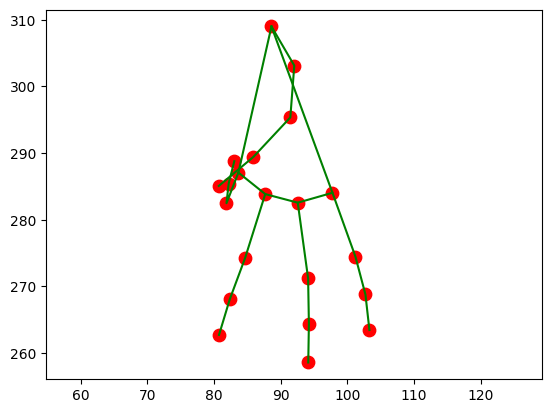

In [ ]:
#raw data sample visualization
#draw lines
record=raw_data.iloc[sample].copy()

plt.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
plt.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
plt.scatter(record[Xs], record[Ys], color='red', s=80)
plt.axis("equal")


(np.float64(-1.6363955690592915),
 np.float64(2.8665299879440687),
 np.float64(-0.05),
 np.float64(1.05))

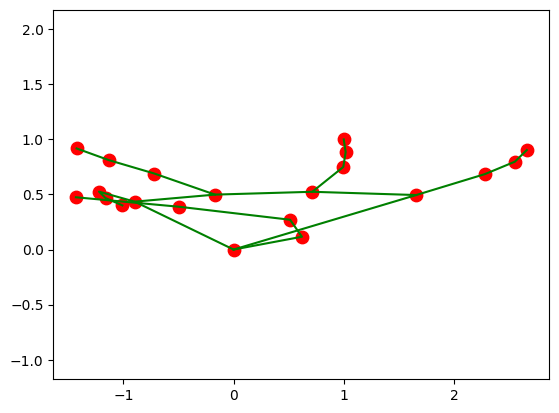

In [ ]:
#raw data sample visualization
#draw lines
record=raw_data.iloc[sample].copy()
record[Xs]=(record[Xs]- record[Xs[0]])
record[Xs]=record[Xs]/record[Xs[12]]
record[Ys]=(record[Ys]- record[Ys[0]])
record[Ys]=(record[Ys]/record[Ys[12]])

plt.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
plt.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
plt.scatter(record[Xs], record[Ys], color='red', s=80)
plt.axis("equal")


(np.float64(-1.7059057119962893),
 np.float64(0.9906683100156253),
 np.float64(-1.0509227861576125),
 np.float64(2.8580153354591866))

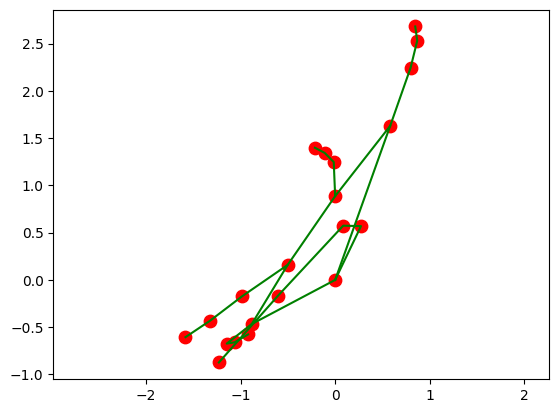

In [ ]:
#data sample
record=raw_data.iloc[sample].copy()

#translate
record[Xs] -= record[Xs[0]]
record[Ys] -= record[Ys[0]]

#scale
record[Xs] /= record[Xs[12]]
record[Ys] /= record[Ys[12]]

#rotate
theta=np.arctan2(record[Xs[9]], record[Ys[9]])
cos= np.cos(theta)
sin= np.sin(theta)

R = np.array([
    [cos,-sin],
    [sin,cos]
])

rotated_points = R @ np.vstack((record[Xs], record[Ys]))
record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

plt.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
plt.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
plt.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
plt.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
plt.scatter(record[Xs], record[Ys], color='red', s=80)
plt.axis("equal")


#### All Samples Visualization

#### Without Scaling

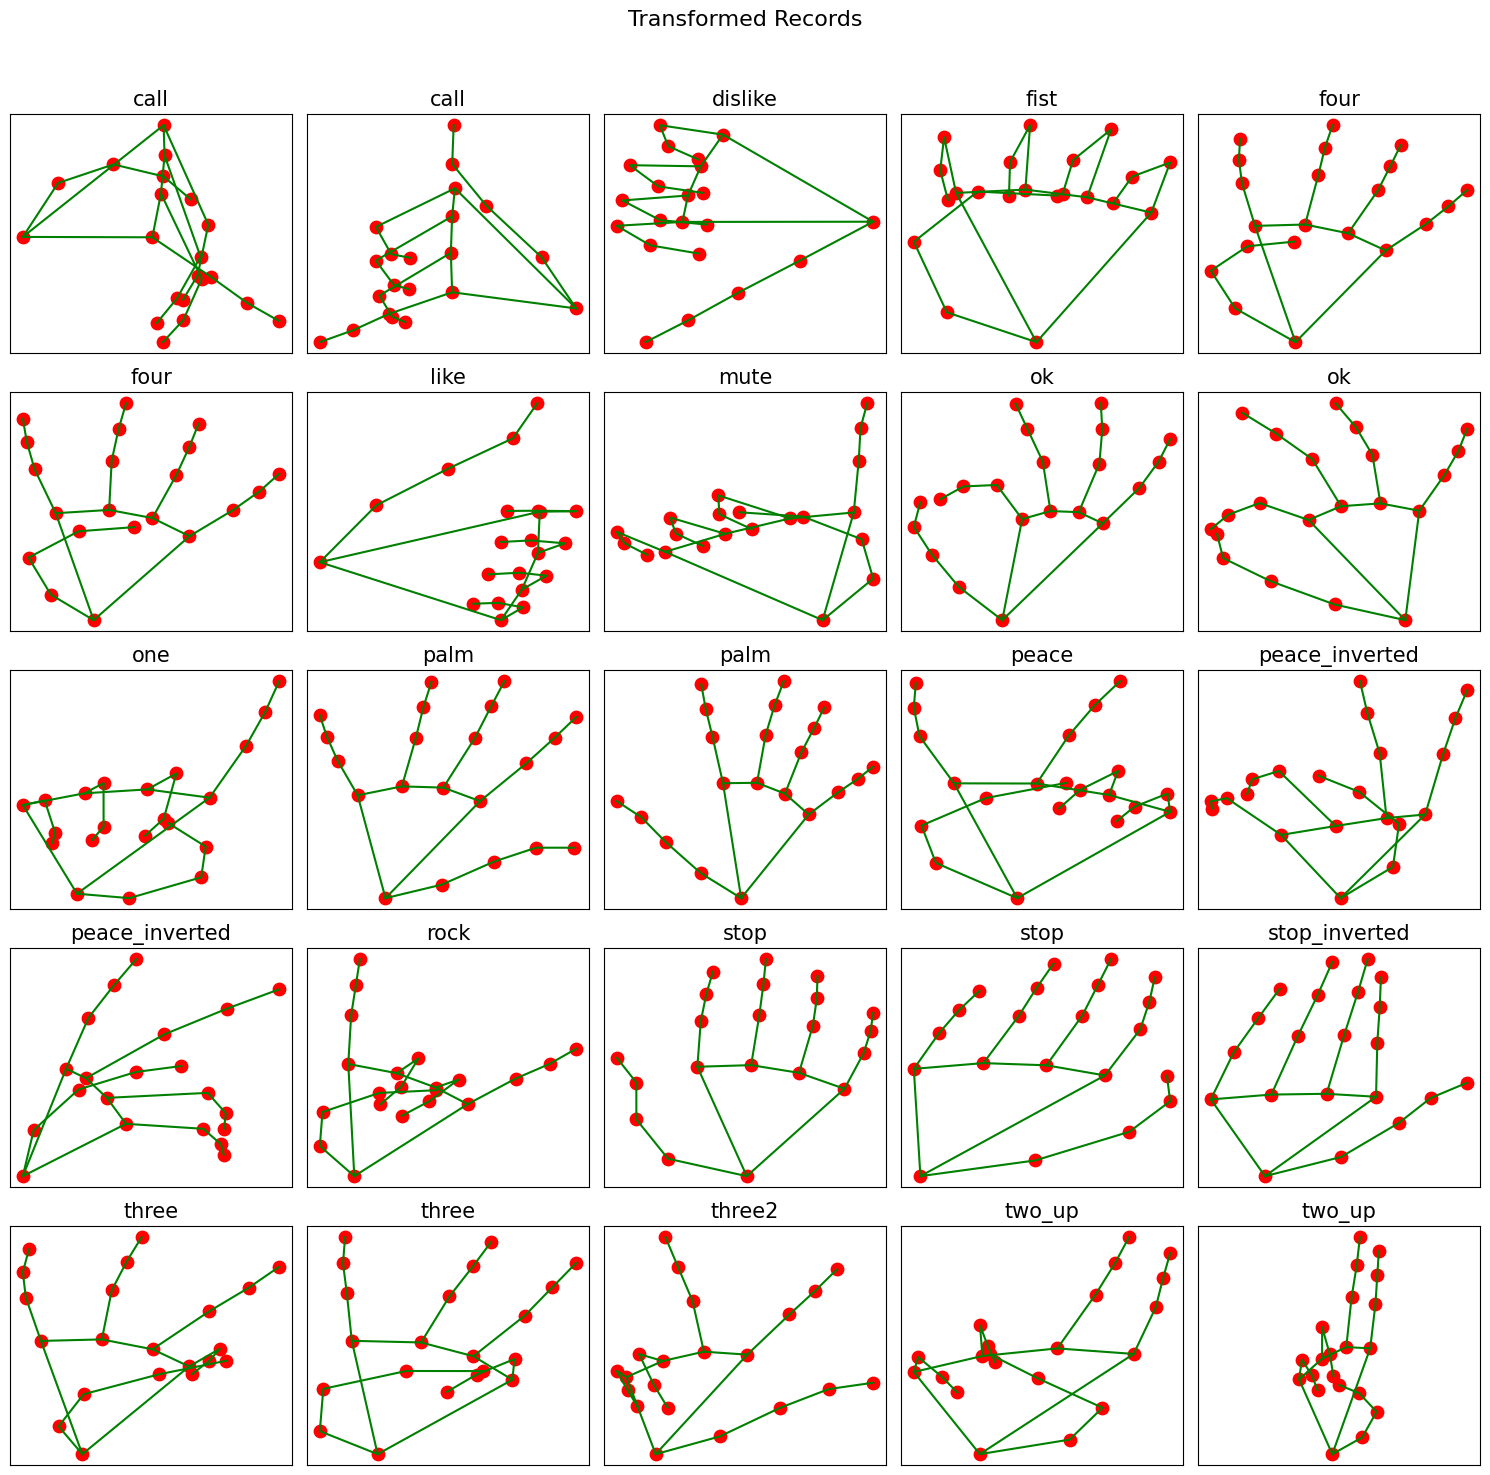

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid
fig.suptitle("Transformed Records", fontsize=16)  # Title for the entire figure

for i in range(25):
    ax = axes[i // 5, i % 5]  # Select the correct subplot in the grid

    # Data sample
    record = raw_data.iloc[i * 1000].copy()

    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    # #scale
    # record[Xs] /= record[Xs[12]]
    # record[Ys] /= record[Ys[12]]

    # #rotate
    # theta=np.arctan2(record[Xs[9]], record[Ys[9]])
    # cos= np.cos(theta)
    # sin= np.sin(theta)

    # R = np.array([
    #     [cos,-sin],
    #     [sin,cos]
    # ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    # Plot lines
    ax.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
    ax.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
    ax.scatter(record[Xs], record[Ys], color='red', s=80)


    # Add a title with the label of the record
    ax.set_title(record["label"], fontsize=15)

    # Remove x and y ticks for clarity
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.axis("equal")
plt.show()


#### With Tip Finger Scaling

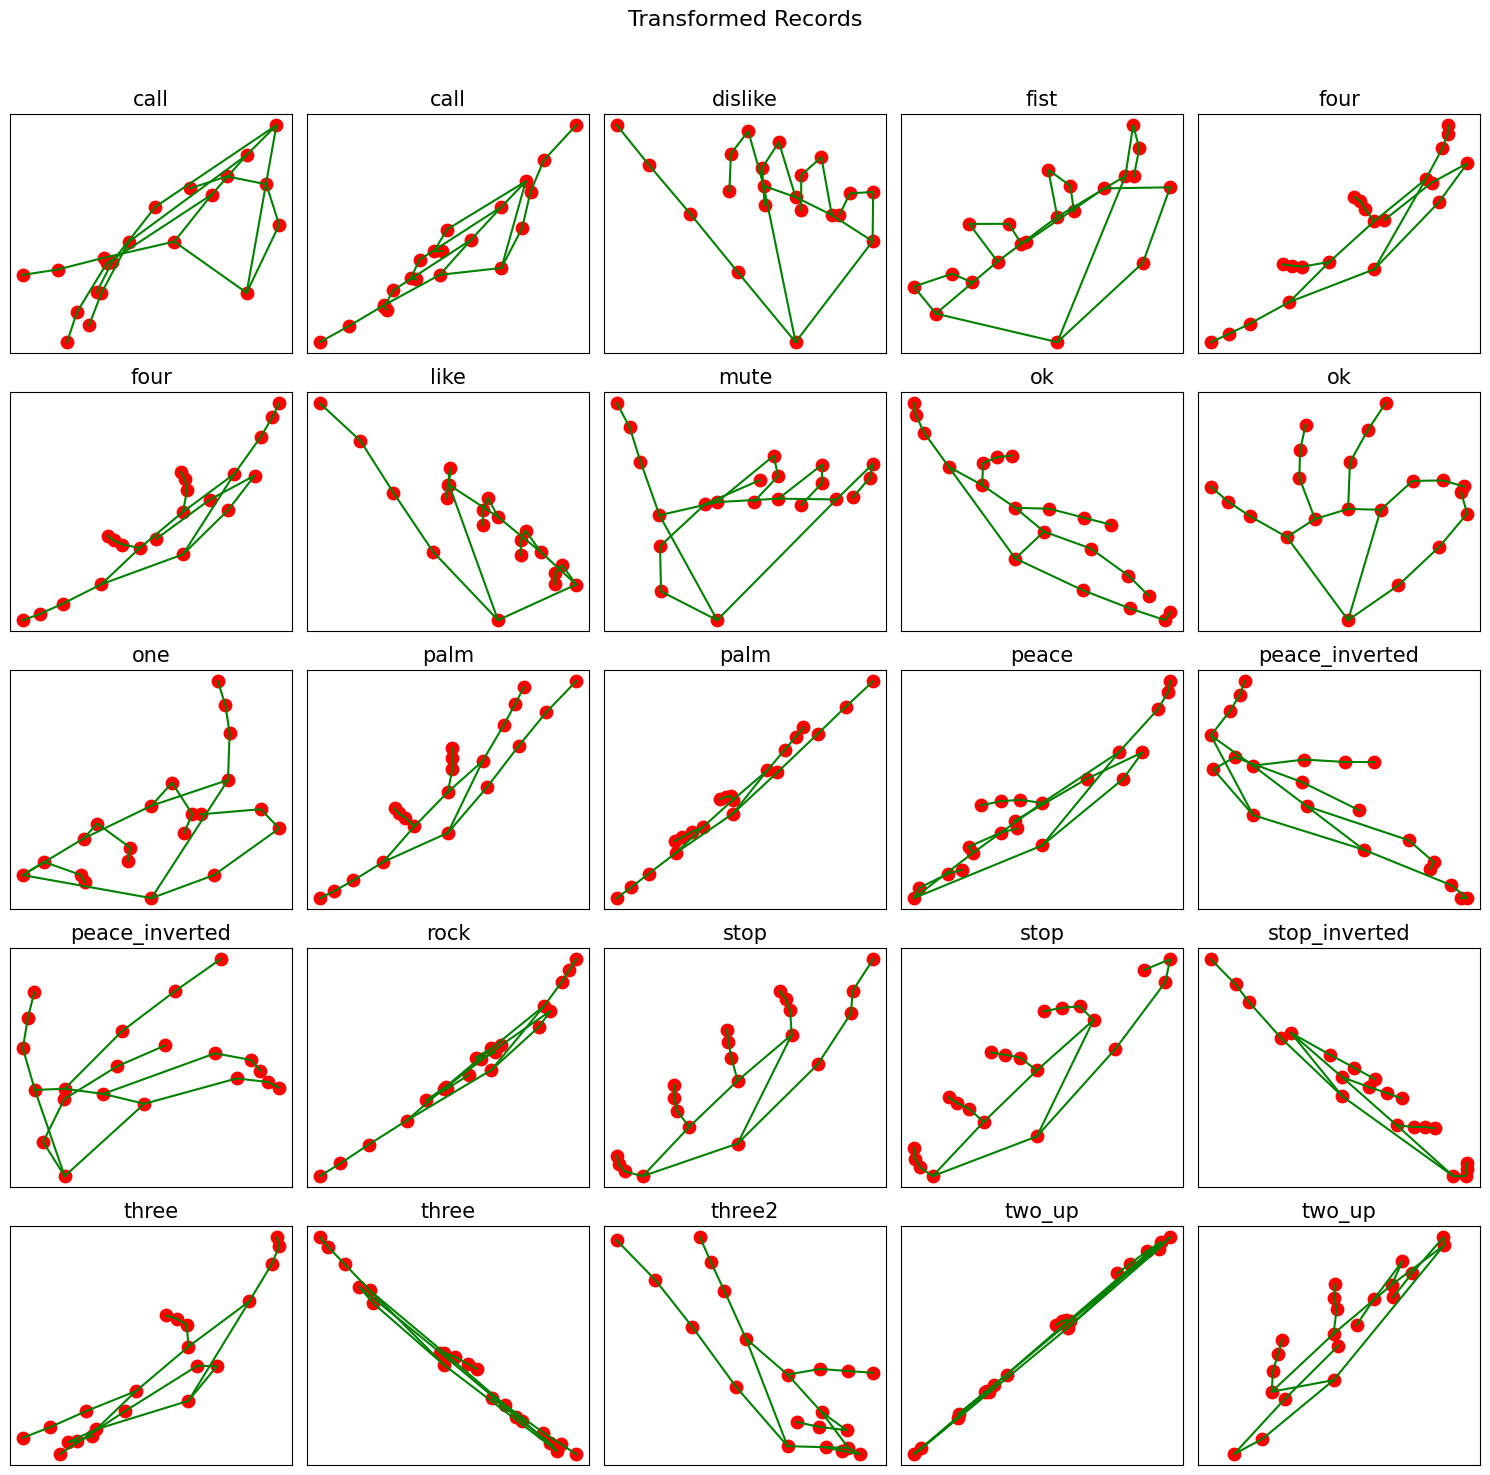

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid
fig.suptitle("Transformed Records", fontsize=16)  # Title for the entire figure

for i in range(25):
    ax = axes[i // 5, i % 5]  # Select the correct subplot in the grid

    # Data sample
    record = raw_data.iloc[i * 1000].copy()

    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    #scale
    record[Xs] /= record[Xs[12]]
    record[Ys] /= record[Ys[12]]

    #rotate
    theta=np.arctan2(record[Xs[9]], record[Ys[9]])
    cos= np.cos(theta)
    sin= np.sin(theta)

    R = np.array([
        [cos,-sin],
        [sin,cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    # Plot lines
    ax.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
    ax.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
    ax.scatter(record[Xs], record[Ys], color='red', s=80)


    # Add a title with the label of the record
    ax.set_title(record["label"], fontsize=15)

    # Remove x and y ticks for clarity
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.axis("equal")
plt.show()


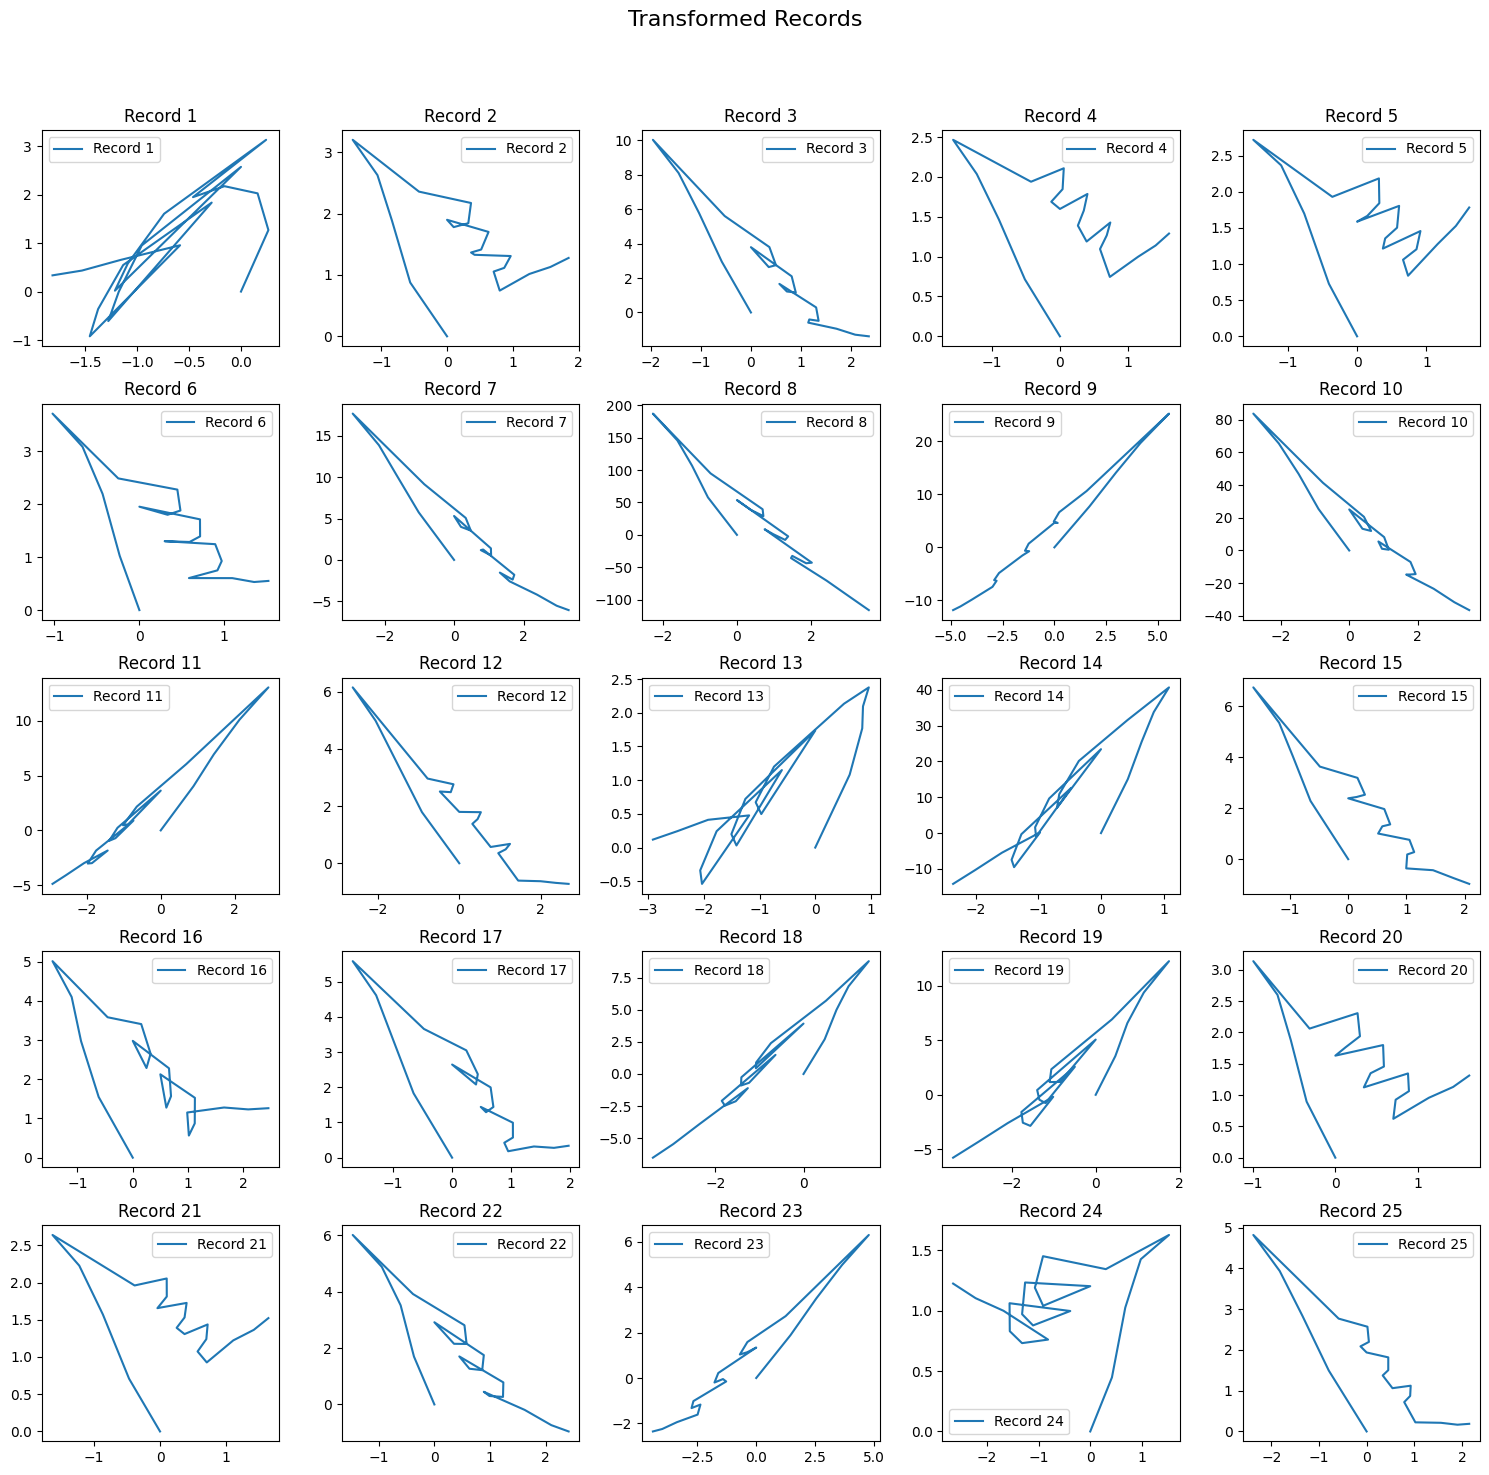

In [ ]:
df1 = raw_data.copy()

def transform_record(record):
    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    # Scale
    record[Xs] /= record[Xs[12]]
    record[Ys] /= record[Ys[12]]

    # Rotate
    theta = np.arctan2(record[Xs[9]], record[Ys[9]])
    cos = np.cos(theta)
    sin = np.sin(theta)

    R = np.array([
        [cos, -sin],
        [sin, cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    return record

# Apply the transformation to each row (axis=1 refers to rows)
df1 = df1.apply(transform_record, axis=1)


In [ ]:
df1.to_csv('preprocessed_data_variations/df1_transformed.csv', index=False)

In [ ]:
df1 = pd.read_csv('preprocessed_data_variations/df1_transformed.csv')


#### With min-max Scaling

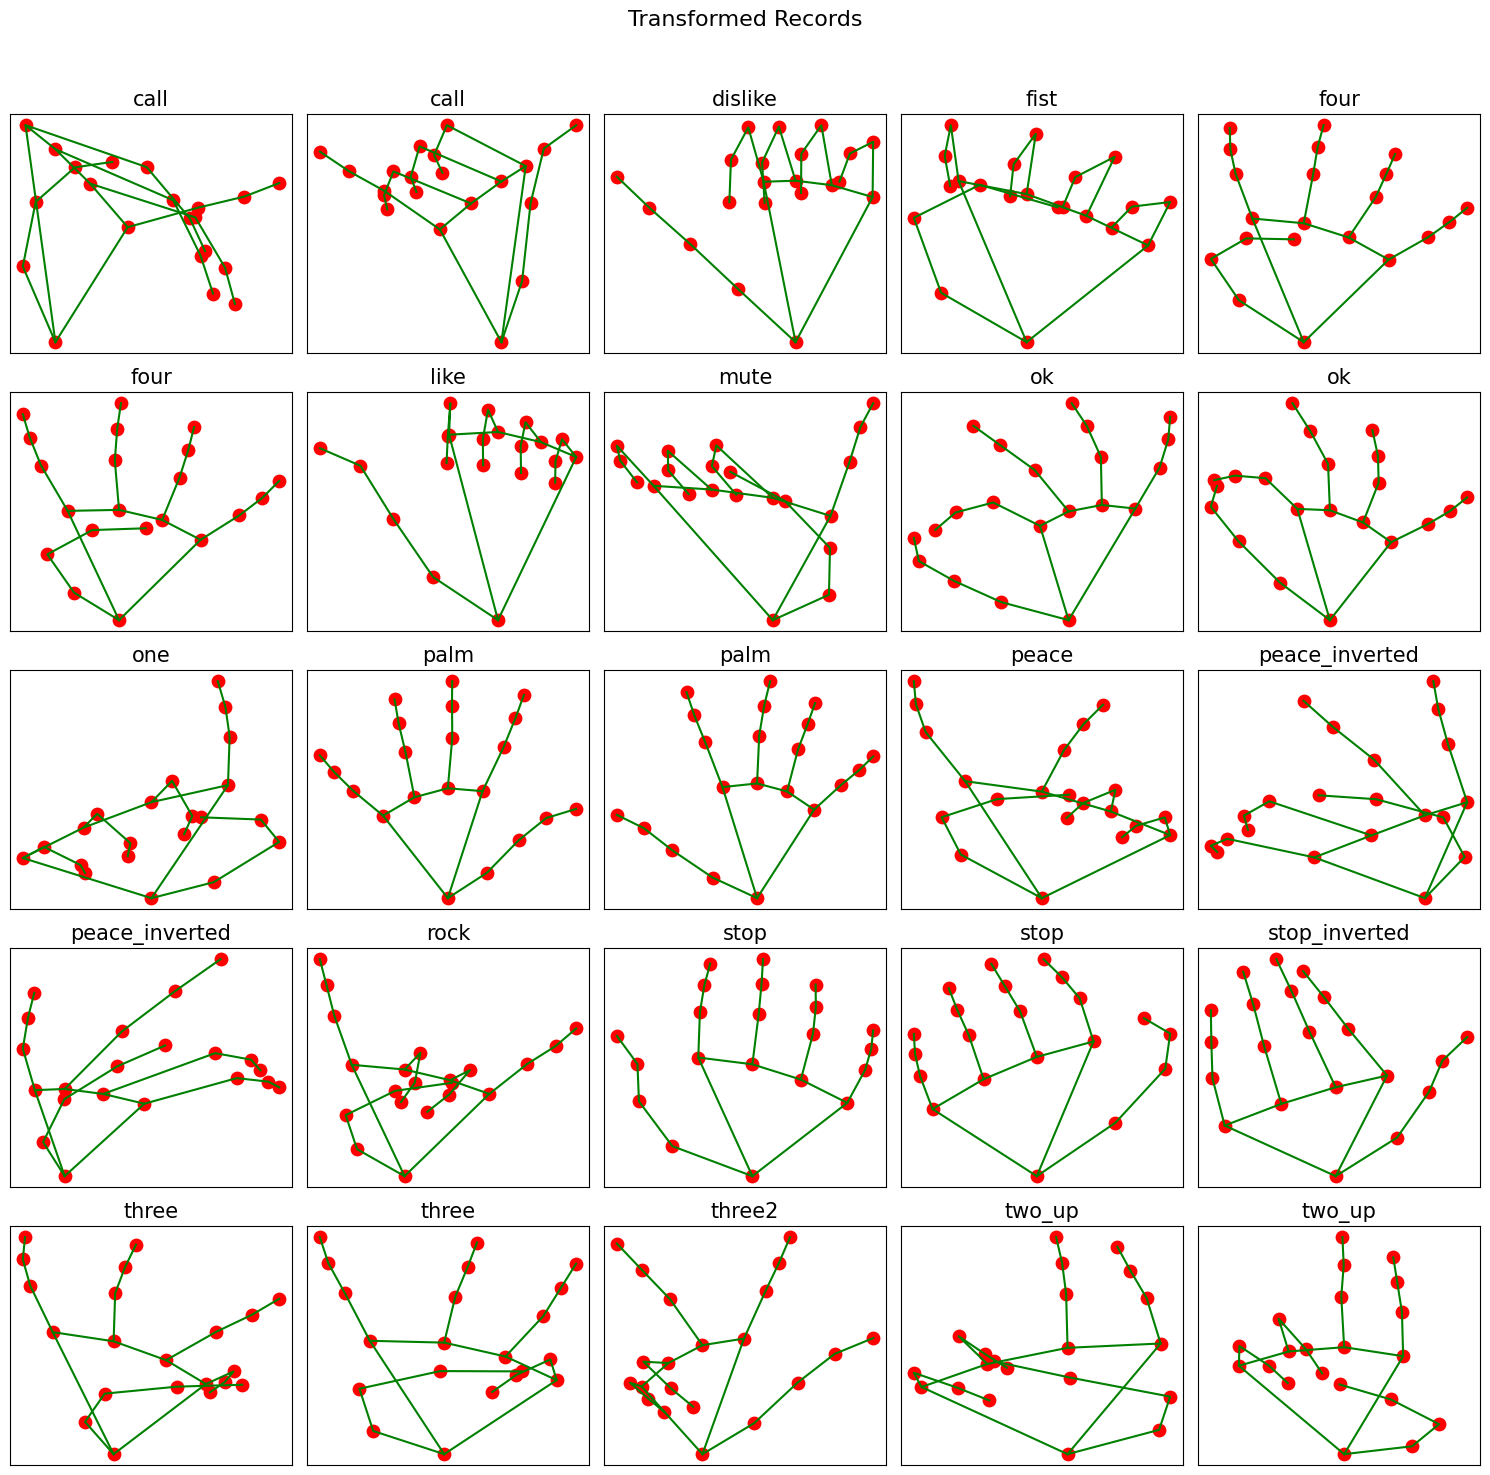

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid
fig.suptitle("Transformed Records", fontsize=16)  # Title for the entire figure

for i in range(25):
    ax = axes[i // 5, i % 5]  # Select the correct subplot in the grid

    # Data sample
    record = raw_data.iloc[i * 1000].copy()

    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    #scale
    record[Xs] /= (max(record[Xs])-min(record[Xs]))
    record[Ys] /= (max(record[Ys])-min(record[Ys]))

    #rotate
    theta=np.arctan2(record[Xs[9]], record[Ys[9]])
    cos= np.cos(theta)
    sin= np.sin(theta)

    R = np.array([
        [cos,-sin],
        [sin,cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    # Plot lines
    ax.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
    ax.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
    ax.scatter(record[Xs], record[Ys], color='red', s=80)


    # Add a title with the label of the record
    ax.set_title(record["label"], fontsize=15)

    # Remove x and y ticks for clarity
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.axis("equal")
plt.show()


In [ ]:
df2=raw_data.copy()

def transform_record(record):
    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    # Scale
    record[Xs] /= (max(record[Xs]) - min(record[Xs]))
    record[Ys] /= (max(record[Ys]) - min(record[Ys]))

    # Rotate
    theta = np.arctan2(record[Xs[9]], record[Ys[9]])
    cos = np.cos(theta)
    sin = np.sin(theta)

    R = np.array([
        [cos, -sin],
        [sin, cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    return record

# Apply the transformation to each row of the DataFrame (assuming raw_data is a DataFrame)
df2 = df2.apply(transform_record, axis=1)

In [ ]:
df2.to_csv('preprocessed_data_variations/df2_transformed.csv', index=False)

In [ ]:
df2 = pd.read_csv('preprocessed_data_variations/df2_transformed.csv')

#### With min-max Scaling and filliping

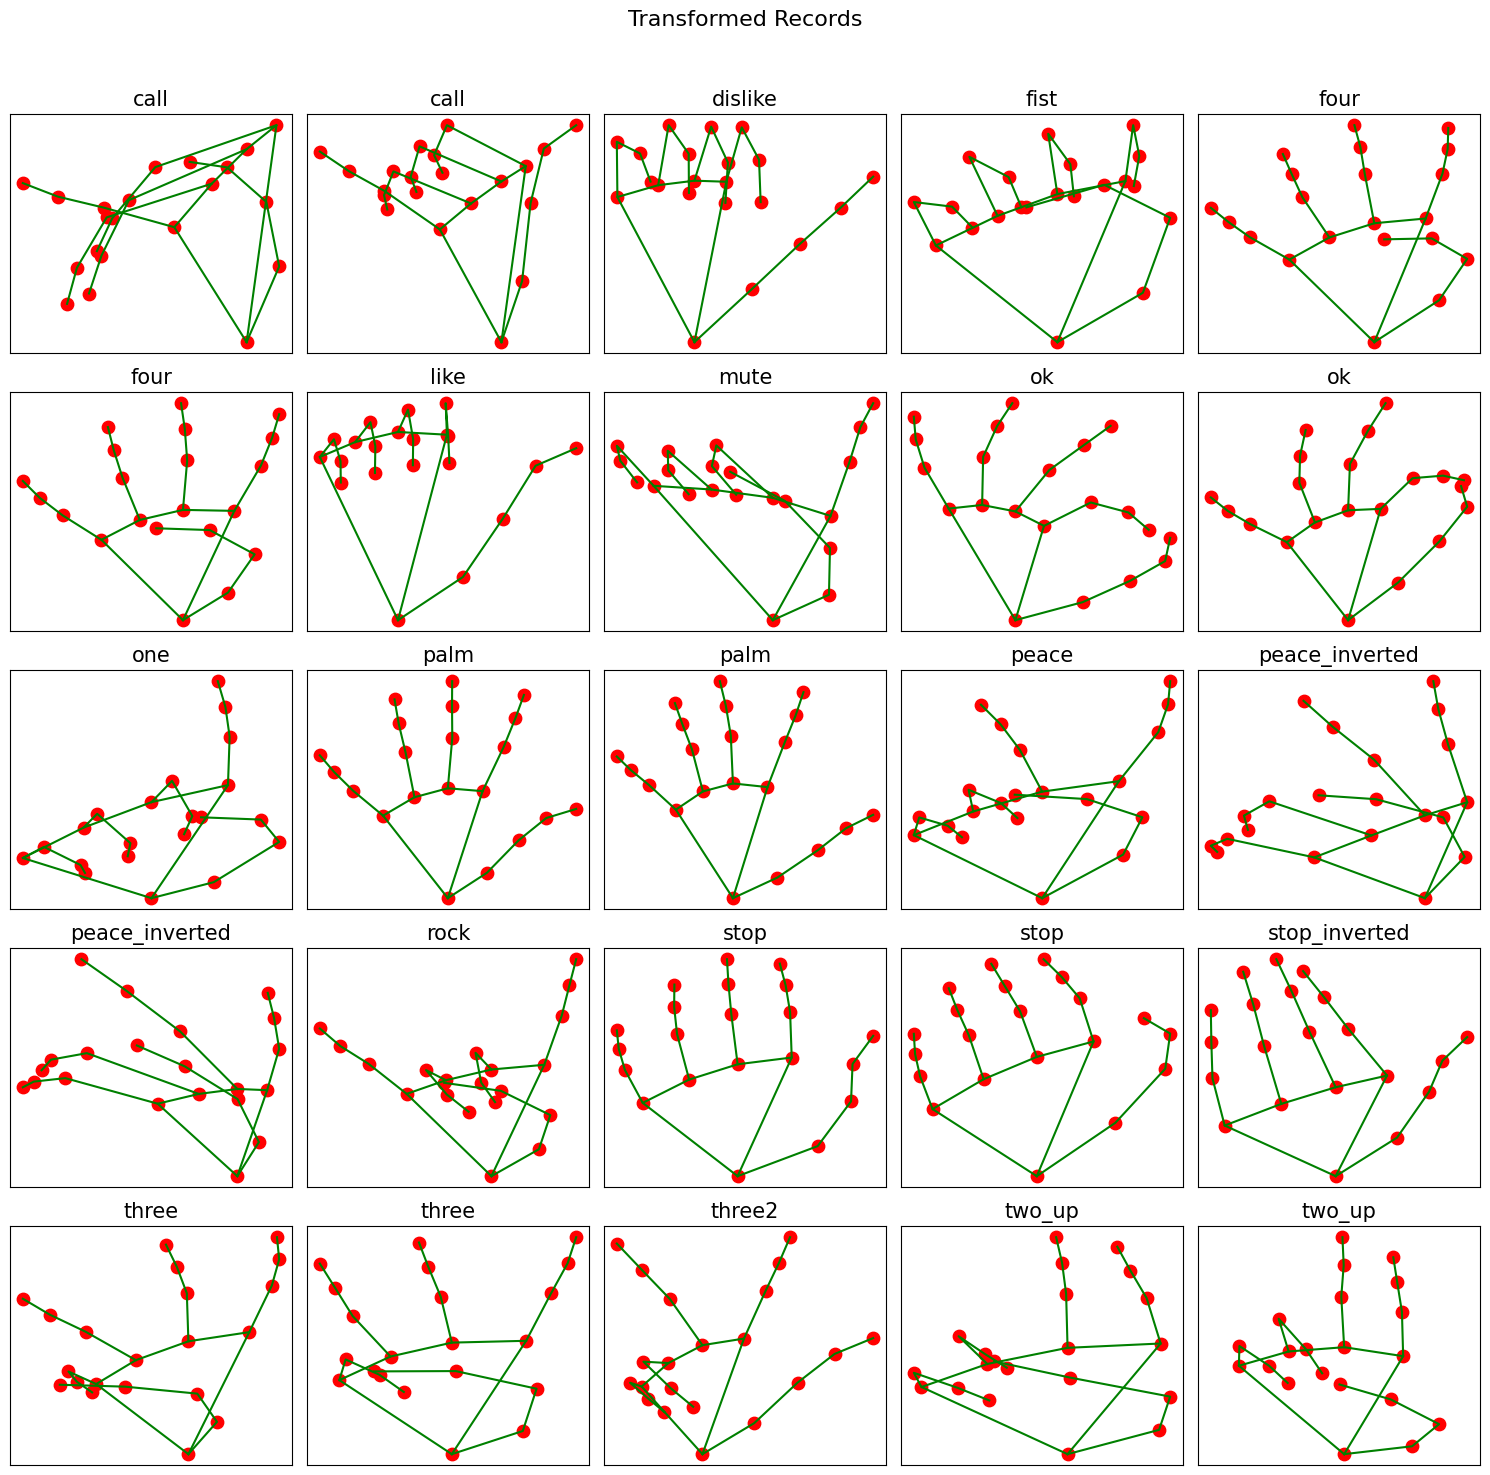

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid
fig.suptitle("Transformed Records", fontsize=16)  # Title for the entire figure

for i in range(25):
    ax = axes[i // 5, i % 5]  # Select the correct subplot in the grid

    # Data sample
    record = raw_data.iloc[i * 1000].copy()

    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    #scale
    record[Xs] /= (max(record[Xs])-min(record[Xs]))
    record[Ys] /= (max(record[Ys])-min(record[Ys]))

    #rotate
    theta=np.arctan2(record[Xs[9]], record[Ys[9]])
    cos= np.cos(theta)
    sin= np.sin(theta)

    R = np.array([
        [cos,-sin],
        [sin,cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]
    record[Xs] = np.sign(record[Xs[5]]-record[Xs[9]])*record[Xs]

    # Plot lines
    ax.plot(record[Xs[0:5]] ,record[Ys[0:5]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[5:9]].tolist(), [record[Ys[0]]] + record[Ys[5:9]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[9:13]] ,record[Ys[9:13]] , color='green', linestyle='-')
    ax.plot(record[Xs[13:17]] ,record[Ys[13:17]] , color='green', linestyle='-')
    ax.plot([record[Xs[0]]] + record[Xs[17:21]].tolist(), [record[Ys[0]]] + record[Ys[17:21]].tolist(), color='green', linestyle='-')
    ax.plot(record[Xs[5:18:4]] ,record[Ys[5:18:4]] , color='green', linestyle='-')
    ax.scatter(record[Xs], record[Ys], color='red', s=80)


    # Add a title with the label of the record
    ax.set_title(record["label"], fontsize=15)

    # Remove x and y ticks for clarity
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.axis("equal")
plt.show()


In [ ]:
df3=raw_data.copy()

def transform_record(record):
    # Translate
    record[Xs] -= record[Xs[0]]
    record[Ys] -= record[Ys[0]]

    # Scale
    record[Xs] /= (max(record[Xs]) - min(record[Xs]))
    record[Ys] /= (max(record[Ys]) - min(record[Ys]))

    # Rotate
    theta = np.arctan2(record[Xs[9]], record[Ys[9]])
    cos = np.cos(theta)
    sin = np.sin(theta)

    R = np.array([
        [cos, -sin],
        [sin, cos]
    ])

    rotated_points = R @ np.vstack((record[Xs], record[Ys]))
    record[Xs], record[Ys] = rotated_points[0], rotated_points[1]

    # Adjust Xs sign based on the difference
    record[Xs] = np.sign(record[Xs[5]] - record[Xs[9]]) * record[Xs]

    return record

# Apply the transformation to each row of the DataFrame (assuming raw_data is a DataFrame)
df3 = df3.apply(transform_record, axis=1)


In [ ]:
df3.to_csv('preprocessed_data_variations/df3_transformed.csv', index=False)

In [ ]:
df3 = pd.read_csv('preprocessed_data_variations/df3_transformed.csv')

### Target preparation

##### Encoding

In [ ]:
data=df3

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
raw_data["target"]=target_encoder.fit_transform(data["label"])

# Save target_encoder
joblib.dump(target_encoder, 'target_encoder.pkl')


['target_encoder.pkl']

In [ ]:
# Load target_encoder
loaded_target_encoder = joblib.load('preprocessing_models/target_encoder.pkl')

In [ ]:
target_encoder.transform(["three2","stop"])

array([15, 12])

##### Splitting

In [ ]:
data.columns

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17',
       'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'label',
       'target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["label","target"]), data["target"], test_size=0.2, random_state=42, stratify=raw_data["target"])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20540, 42)
(20540,)
(5135, 42)
(5135,)


### Model Training

#### xgboost

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)

# Train the model with training data (features and labels)
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.51%


In [ ]:
from xgboost import XGBClassifier #sofprob,maxdepth 6 eta 0.3
from sklearn.metrics import accuracy_score

model = XGBClassifier(
    objective='multi:softmax', #softprob,softmax
    num_class=18,
    eval_metric='mlogloss',
    max_depth=4,
    eta=0.25 ,
    random_state=42

)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.42%


In [ ]:
model.save_model('xgb_model.json')  # Saves the model in JSON format

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model('model_variations/xgb_model.json')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Set the random_state for reproducibility and define the number of estimators
base_estimator = DecisionTreeClassifier(max_depth=8)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator,random_state=42, n_estimators=50,learning_rate=0.5)

# Train the AdaBoost model with the training data (features and labels)
adaboost_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.09%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier with a random state for reproducibility
random_forest_classifier = RandomForestClassifier(random_state=42, n_estimators=20, max_depth=13)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = random_forest_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 97.76%


### Live Model Testing